In [1]:
from functools import partial

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

In [3]:
COVID_CSV_URL = "https://dl.dropboxusercontent.com/s/6mztoeb6xf78g5w/COVID-19.csv"
COVID_CSV_FILE = "COVID-19.csv"

In [98]:
data = pd.read_csv(COVID_CSV_URL, low_memory=False, dtype={
    '年代': 'category',
    '性別': 'category',
    '受診都道府県': 'category',
    '居住都道府県': 'category',
    '居住管内': 'category',
    '居住市区町村': 'category',
    'キー': 'category',
    '発表': 'category',
    'ステータス': 'category',
    '職業_正誤確認用': 'category',
    '勤務先_正誤確認用': 'category',
    'Hospital Pref': 'category',
    'Residential Pref': 'category',
    'Release': 'category',
    'Gender': 'category',
    '受診都道府県コード': 'category',
    '居住都道府県コード': 'category',
}, parse_dates=[
    "確定日", "発症日", "確定日YYYYMMDD", "更新日時",
])

data.drop([
    'Field2',
    'Field4',
    'Field5',
    'Field6',
    'Field7',
    'Field8',
    'Field9',
    'Field10',
], axis=1, inplace=True)

data.rename(columns={
    '通し': 'id',
    '厚労省NO': 'id_ministry',
    '無症状病原体保有者': 'asymptomatic',
    '国内': 'domestic',
    'チャーター便': 'charter',
    '年代': 'age',
    '性別': 'gender',
    '確定日': 'date_diagnosed',
    '発症日': 'date_infected',
    '受診都道府県': 'pref_diagnosis',
    '居住都道府県': 'pref_residence',
    '居住管内': 'jurisdiction',
    '居住市区町村': 'city',
    'キー': 'location_key',
    '発表': 'pref_announcement',
    '都道府県内症例番号': 'id_pref',
    '市町村内症例番号': 'id_city',
    'ステータス': 'status',
    '備考': 'notes',
    'ソース': 'source_1',
    'ソース2': 'source_2',
    'ソース3': 'source_3',
    '人数': 'n_infected',
    '累計': 'tot_infected',
    '前日比': 'change_infected',
    '発症数': 'n_outbreak',
    '死者合計': 'tot_deaths',
    '退院数累計': 'tot_discharged',
    '退院数': 'n_discharged',
    'PCR検査実施人数': 'n_tested',
    'PCR検査前日比': 'change_tested',
    '職業_正誤確認用': 'occupation',
    '勤務先_正誤確認用': 'workplace',
    'Hospital Pref': 'pref_diagnosis_en',
    'Residential Pref': 'pref_residence_en',
    'Release': 'pref_announcement_en',
    'Gender': 'gender_en',
    'X': 'lon',
    'Y': 'lat',
    '確定日YYYYMMDD': 'date_diagnosed_ymd',
    '受診都道府県コード': 'pref_diagnosis_id',
    '居住都道府県コード': 'pref_residence_id',
    '更新日時': 'time_updated',
}, inplace=True)

data.asymptomatic = ~data.asymptomatic.isnull().astype(bool)
data.time_updated[0]

Timestamp('2020-07-23 22:49:00')

In [99]:
data.describe()

,id,n_infected,tot_infected,change_infected,n_outbreak,tot_deaths,tot_discharged,n_discharged,n_tested,change_tested,lon,lat
count,27381.000000,27381.0,177.000000,177.000000,177.000000,160.000000,164.000000,164.000000,142.000000,140.000000,27381.000000,27381.000000
mean,13691.000000,1.0,10571.220339,156.056497,66.050847,491.593750,7630.560976,118.689024,244675.943662,4494.564286,135.979524,35.177225
std,7904.358197,0.0,8557.148954,179.909501,80.009536,410.788983,7512.135585,155.840274,192095.272361,3659.356338,17.265454,4.811282
min,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,6519.000000,2.000000,-77.036871,-33.923665
25%,6846.000000,1.0,791.000000,30.000000,13.000000,44.500000,281.750000,12.000000,62220.250000,1972.000000,135.751464,34.975184
50%,13691.000000,1.0,13804.000000,64.000000,32.000000,515.500000,4298.000000,64.000000,227274.500000,3761.500000,139.691647,35.689185
75%,20536.000000,1.0,17349.000000,241.000000,95.000000,924.250000,15514.750000,156.250000,384337.500000,5737.500000,139.691647,35.689185
max,27381.000000,1.0,27381.000000,695.000000,348.000000,990.000000,21035.000000,948.000000,688036.000000,17810.000000,145.584453,53.299312


In [100]:
data.head()

,id,id_ministry,asymptomatic,domestic,charter,age,gender,date_diagnosed,date_infected,pref_diagnosis,...,pref_diagnosis_en,pref_residence_en,pref_announcement_en,gender_en,lon,lat,date_diagnosed_ymd,pref_diagnosis_id,pref_residence_id,time_updated
0,1.0,1,False,A-1,NaN,30,男性,2020-01-15,2020-01-03,神奈川県,...,Kanagawa,Kanagawa,Kanagawa Prefecture,Male,139.642347,35.447504,2020-01-15,14,14,2020-07-23 22:49:00
1,2.0,2,False,A-2,NaN,40,男性,2020-01-24,2020-01-14,東京都,...,Tokyo,China(Mainland),Tokyo Metropolitan Government,Male,116.409685,39.903832,2020-01-24,13,NaN,NaT
2,3.0,3,False,A-3,NaN,30,女性,2020-01-25,2020-01-21,東京都,...,Tokyo,China(Mainland),Tokyo Metropolitan Government,Female,116.409685,39.903832,2020-01-25,13,NaN,NaT
3,4.0,4,False,A-4,NaN,40,男性,2020-01-26,2020-01-23,愛知県,...,Aichi,China(Mainland),Aichi Prefecture,Male,116.409685,39.903832,2020-01-26,23,NaN,NaT
4,5.0,5,False,A-5,NaN,40,男性,2020-01-28,2020-01-22,愛知県,...,Aichi,China(Mainland),Aichi Prefecture,Male,116.409685,39.903832,2020-01-28,23,NaN,NaT


In [101]:
data[data.pref_diagnosis_en == "Ishikawa"][["date_diagnosed", "n_infected"]]

,date_diagnosed,n_infected
98,2020-02-21,1.0
131,2020-02-22,1.0
149,2020-02-24,1.0
158,2020-02-24,1.0
194,2020-02-27,1.0
...,...,...
24334,2020-07-17,1.0
25641,2020-07-20,1.0
26253,2020-07-21,1.0
26254,2020-07-21,1.0


In [102]:
date_range = pd.date_range(data.date_infected.min(), data.date_diagnosed.max())

In [103]:
data.columns

Index(['id', 'id_ministry', 'asymptomatic', 'domestic', 'charter', 'age',
       'gender', 'date_diagnosed', 'date_infected', 'pref_diagnosis',
       'pref_residence', 'jurisdiction', 'city', 'location_key',
       'pref_announcement', 'id_pref', 'id_city', 'status', 'notes',
       'source_1', 'source_2', 'source_3', 'n_infected', 'tot_infected',
       'change_infected', 'n_outbreak', 'tot_deaths', 'tot_discharged',
       'n_discharged', 'n_tested', 'change_tested', 'occupation', 'workplace',
       'pref_diagnosis_en', 'pref_residence_en', 'pref_announcement_en',
       'gender_en', 'lon', 'lat', 'date_diagnosed_ymd', 'pref_diagnosis_id',
       'pref_residence_id', 'time_updated'],
      dtype='object')

In [104]:
def day_name(df, col="date_diagnosed", japanese=True):
    return df[col].dt.day_name().replace({
        "Monday": "月曜日",
        "Tuesday": "火曜日",
        "Wednesday": "水曜日",
        "Thursday": "木曜日",
        "Friday": "金曜日",
        "Saturday": "土曜日",
        "Sunday": "日曜日",
    } if japanese else {})

In [105]:
def n_infected(pref=None, window=7):
    if pref is None:
        subset = data
    else:
        subset = data[data.pref_diagnosis_en == pref]
    df = (
        subset[["date_diagnosed", "n_infected"]]
        .groupby(by="date_diagnosed")
        .aggregate("sum")
        .reindex(date_range, fill_value=0)
    )
    df.index.set_names("確定日", inplace=True)
    if pref is None:
        print(f"{df.n_infected[-5:]} -> [795, 981]")
#         df.n_infected[-2:] = [795, 981]
    df["移動平均"] = df.n_infected.rolling(window=window).mean()
    return df.rename(columns={"n_infected": "感染者数"})

def n_exposed(pref=None, window=7):
    if pref is None:
        subset = data
    else:
        subset = data[data.pref_diagnosis_en == pref]
    df = (
        subset[["date_infected", "n_infected"]]
        .groupby(by="date_infected")
        .aggregate("sum")
        .reindex(date_range, fill_value=0)
    )
    df.index.set_names("発症日", inplace=True)
    df["移動平均"] = df.n_infected.rolling(window=window).mean()
    return df.rename(columns={"n_infected": "感染者数"})

def by_week(df):
    return df.resample("W").sum()[:-1]

def percent_change(df):
    return df.diff() / df

<AxesSubplot:title={'center':'東京の感染者数'}, xlabel='確定日'>

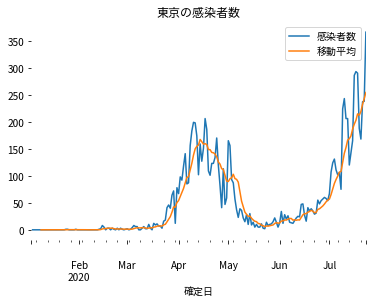

In [106]:
tokyo_by_day = n_infected("Tokyo")
plt.close(); tokyo_by_day.plot(title="東京の感染者数")

確定日
2020-07-19    464.0
2020-07-20    469.0
2020-07-21    521.0
2020-07-22    470.0
2020-07-23    492.0
Freq: D, Name: n_infected, dtype: float64 -> [795, 981]


<AxesSubplot:title={'center':'全国の感染者数'}, xlabel='確定日'>

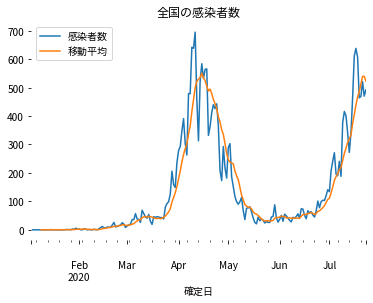

In [110]:
japan_by_day = n_infected()
plt.close(); japan_by_day.plot(title="全国の感染者数")

In [111]:
japan_by_day.sum()

感染者数    27381.000000
移動平均    25905.571429
dtype: float64

In [112]:
japan_by_day[-23:]

,感染者数,移動平均
確定日,,
2020-07-01,134.0,111.285714
2020-07-02,207.0,129.714286
2020-07-03,241.0,150.000000
2020-07-04,271.0,173.857143
2020-07-05,196.0,187.142857
2020-07-06,190.0,197.142857
2020-07-07,241.0,211.428571
2020-07-08,188.0,219.142857
2020-07-09,377.0,243.428571


<AxesSubplot:title={'center':'東京の週ごと感染者数'}, xlabel='確定日'>

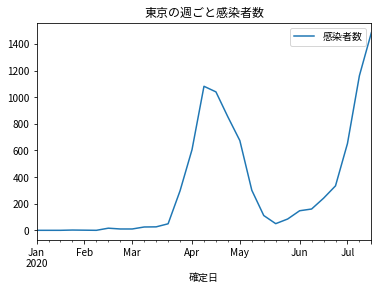

In [14]:
tokyo_by_week = by_week(tokyo_by_day)
plt.close(); tokyo_by_week.plot(y="感染者数", title="東京の週ごと感染者数")

<AxesSubplot:title={'center':'全国の週ごと感染者数'}, xlabel='確定日'>

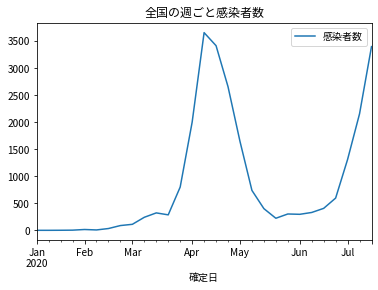

In [15]:
japan_by_week = by_week(japan_by_day)
plt.close(); japan_by_week.plot(y="感染者数", title="全国の週ごと感染者数")

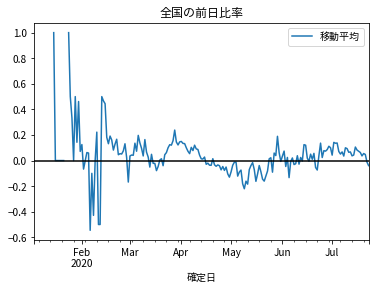

In [16]:
plt.close()
fig, ax = plt.subplots()
percent_change(japan_by_day).plot(y="移動平均", title="全国の前日比率", ax=ax)
ax.axhline(0, color="black")

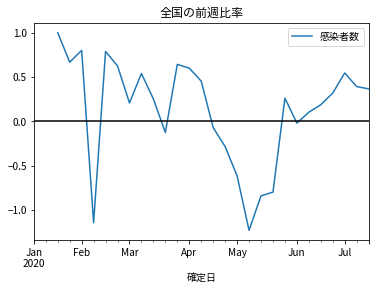

In [17]:
plt.close()
fig, ax = plt.subplots()
percent_change(japan_by_week).plot(y="感染者数", title="全国の前週比率", ax=ax)
ax.axhline(0, color="black")

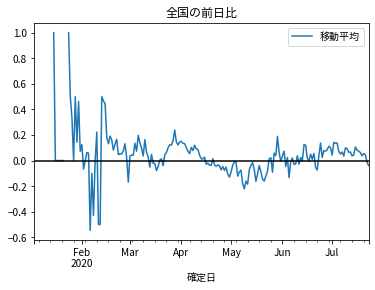

In [18]:
plt.close()
fig, ax = plt.subplots()
percent_change(japan_by_day).plot(y="移動平均", title="全国の前日比", ax=ax)
ax.axhline(0, color="black")

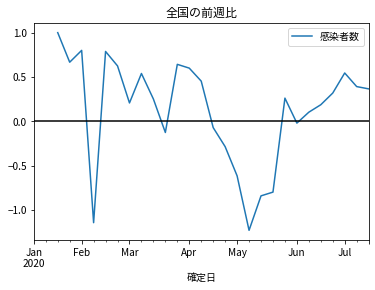

In [19]:
plt.close()
fig, ax = plt.subplots()
percent_change(japan_by_week).plot(y="感染者数", title="全国の前週比", ax=ax)
ax.axhline(0, color="black")

In [20]:
import matplotlib
plt.rcParams['xtick.major.pad']='17'
plt.rcParams["axes.axisbelow"] = False
matplotlib.rc('axes',edgecolor='w')
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [21]:
japan_by_day

,感染者数,移動平均
確定日,,
2020-01-03,0.0,NaN
2020-01-04,0.0,NaN
2020-01-05,0.0,NaN
2020-01-06,0.0,NaN
2020-01-07,0.0,NaN
...,...,...
2020-07-19,464.0,485.285714
2020-07-20,469.0,513.428571
2020-07-21,521.0,539.142857


In [22]:
japan_day_of_week = japan_by_day.reset_index()
japan_day_of_week["曜日"] = day_name(japan_day_of_week, "確定日")
japan_day_of_week.set_index("確定日", inplace=True)
japan_day_of_week

,感染者数,移動平均,曜日
確定日,,,
2020-01-03,0.0,NaN,金曜日
2020-01-04,0.0,NaN,土曜日
2020-01-05,0.0,NaN,日曜日
2020-01-06,0.0,NaN,月曜日
2020-01-07,0.0,NaN,火曜日
...,...,...,...
2020-07-19,464.0,485.285714,日曜日
2020-07-20,469.0,513.428571,月曜日
2020-07-21,521.0,539.142857,火曜日


In [23]:
active_week = date_range.week
day_of_week = date_range.dayofweek + (active_week - 1) * 7
big_angle= 360/7  # How we split our polar space
date_angle=np.deg2rad((360/7)*day_of_week)  # For a day, a corresponding angle

In [24]:
inner = 0
outer = 800
ocean_color = ["#004752", "#ff7f50"]
days_japanese = ["月曜日", "火曜日", "水曜日", "木曜日", "金曜日", "土曜日", "日曜日"]

In [25]:
data.time_updated[0]

Timestamp('2020-07-23 16:45:00')

In [26]:
from scipy import interpolate

In [1]:
def dress_axes(ax, daily=True, rolling=True, inner=0, outer=100, title=""):
    ax.set_facecolor('w')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    # Here is how we position the week labels

    ax.set_xticks(np.arange(0, 360, big_angle) * np.pi / 180)
    ax.set_xticklabels(days_japanese, fontsize=16)
    if outer > 5000:
        step_size = 1000
    elif outer > 1000:
        step_size = 200
    if outer > 500:
        step_size = 100
    elif outer > 100:
        step_size = 50
    elif outer > 50:
        step_size = 20
    else:
        step_size = 10
    step_size = 100 if outer > 500 else 50
    ax.set_yticks(range(inner + step_size, outer, step_size))
    ax.set_yticklabels(range(inner + step_size, outer, step_size), fontsize=13)
    # Changing radial ticks angle

    ax.set_rlabel_position(359)
    ax.tick_params(axis='both',color='w')
    ax.grid(None,axis='x')
    ax.grid(axis='y',color='w', linestyle=':', linewidth=1)    
    # Here is the bar plot that we use as background

    bars = ax.bar(middles, outer+200, width=big_angle*np.pi/180, bottom=inner, color='lightgray', edgecolor='w',zorder=0)
    ax.set_ylim([(inner - outer) / 4, outer])
    # Custom legend

    legend_elements = []
    if daily:
        legend_elements.append(Line2D([0], [0], marker='o', color='w', label='感染者数', markerfacecolor=ocean_color[0], markersize=15))
    if rolling:
        legend_elements.append(Line2D([0], [0], marker='o', color='w', label='移動平均', markerfacecolor=ocean_color[1], markersize=15))
    ax.legend(handles=legend_elements, loc='center', fontsize=13, frameon=False)
    # Main title for the figure

    fig.suptitle((f"{title}の" if title else "") + "曜日ごと感染者数", fontsize=24, horizontalalignment='center')
    fig.text(1, 0, f"作者：@_masasin\nデータ更新日時：{data.time_updated[0]} JST\nソース：https://jag-japan.com/covid19map-readme/", horizontalalignment='right', verticalalignment="bottom", fontsize=14)

In [28]:
x = np.arange(len(date_angle))
y = date_angle.values
f = interpolate.interp1d(x, y)
xvals = np.arange(len(date_angle)-1+1/50, step=1/50)
yinterp = np.interp(xvals, x, y)

In [29]:
def draw_data(df, i, daily=False, rolling=False, title=""):
    # Clear
    outer = int(np.ceil(df.max().max()/100)*100)

    ax.cla()
    # Redressing axes

    dress_axes(ax, daily, rolling, outer=outer, title=title)

    i_this_week = np.max([(i-6), 0]) * 50 + 1
    i_today = i*50 + 1
    

    if daily:
        dailies = df["感染者数"]
        interped = np.interp(xvals, x, dailies)
        ax.plot(yinterp[i_this_week:i_today], interped[i_this_week:i_today],'-',color=ocean_color[0],alpha=1.0,linewidth=5)     
        ax.plot(yinterp[:i_today], interped[:i_today],'-',color=ocean_color[0],linewidth=0.7)     

    if rolling:
        rollers = df["移動平均"]
        interped = np.interp(xvals, x, rollers)
        ax.plot(yinterp[i_this_week:i_today], interped[i_this_week:i_today],'-',color=ocean_color[1],alpha=1.0,linewidth=5)     
        ax.plot(yinterp[:i_today], interped[:i_today],'-',color=ocean_color[1],linewidth=0.7)     

    # Plotting a line to spot the current date easily

    ax.plot([date_angle[i], date_angle[i]], [inner,outer], 'k-', linewidth=0.5)
    # Display the current year as a title, just beneath the suptitle
    date = df.index[i]

    plt.title(f"{date.year}年{active_week[i]}週目 ({date.month}月{date.day}日{days_japanese[date.dayofweek]})", fontsize=18, horizontalalignment='center')
    plt.tight_layout()

# Test it

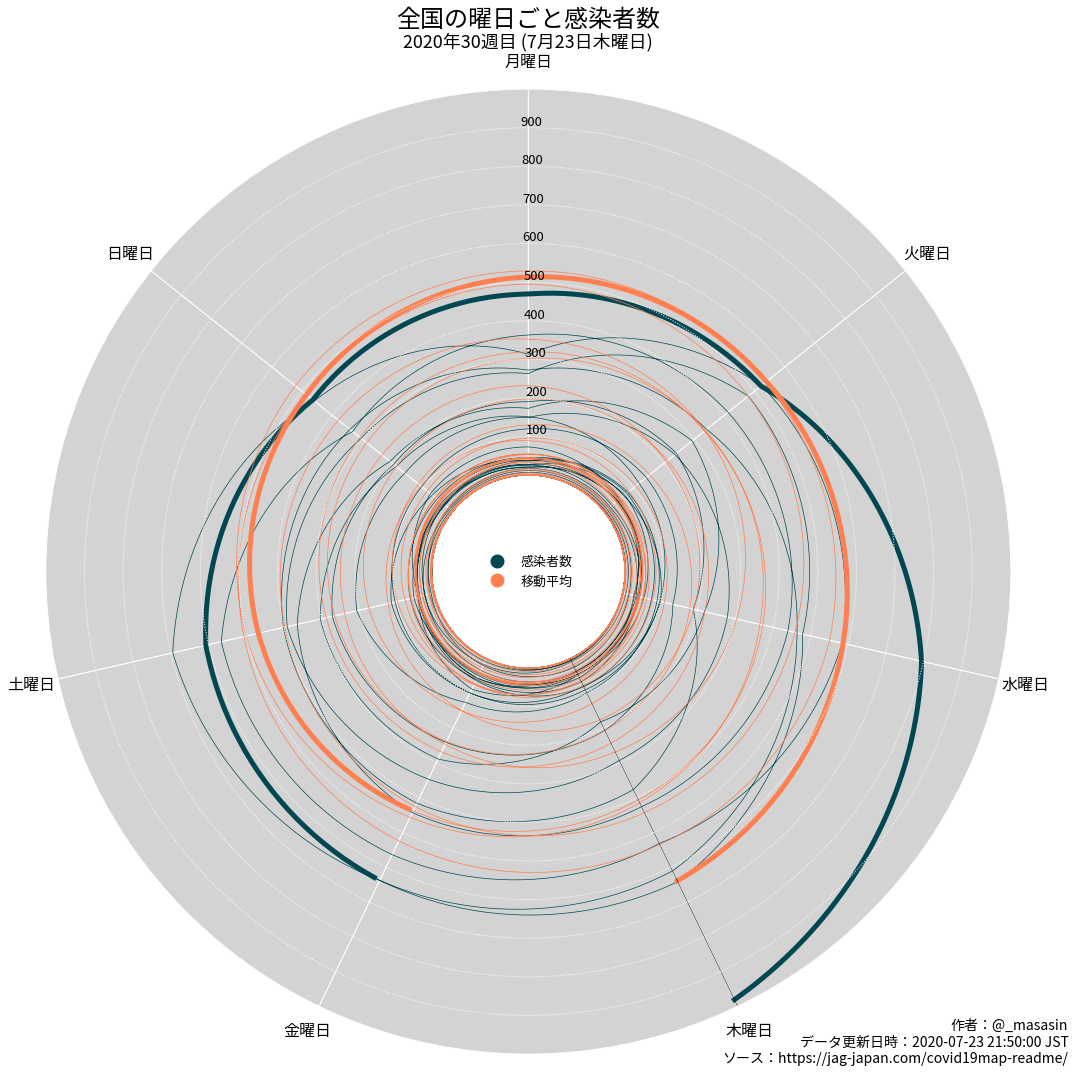

In [66]:
plt.close()
size=15
fig, ax = plt.subplots(figsize=(size, size), subplot_kw=dict(polar=True))
draw_data(japan_by_day, len(japan_by_day)-1, daily=True, rolling=True, title="全国")

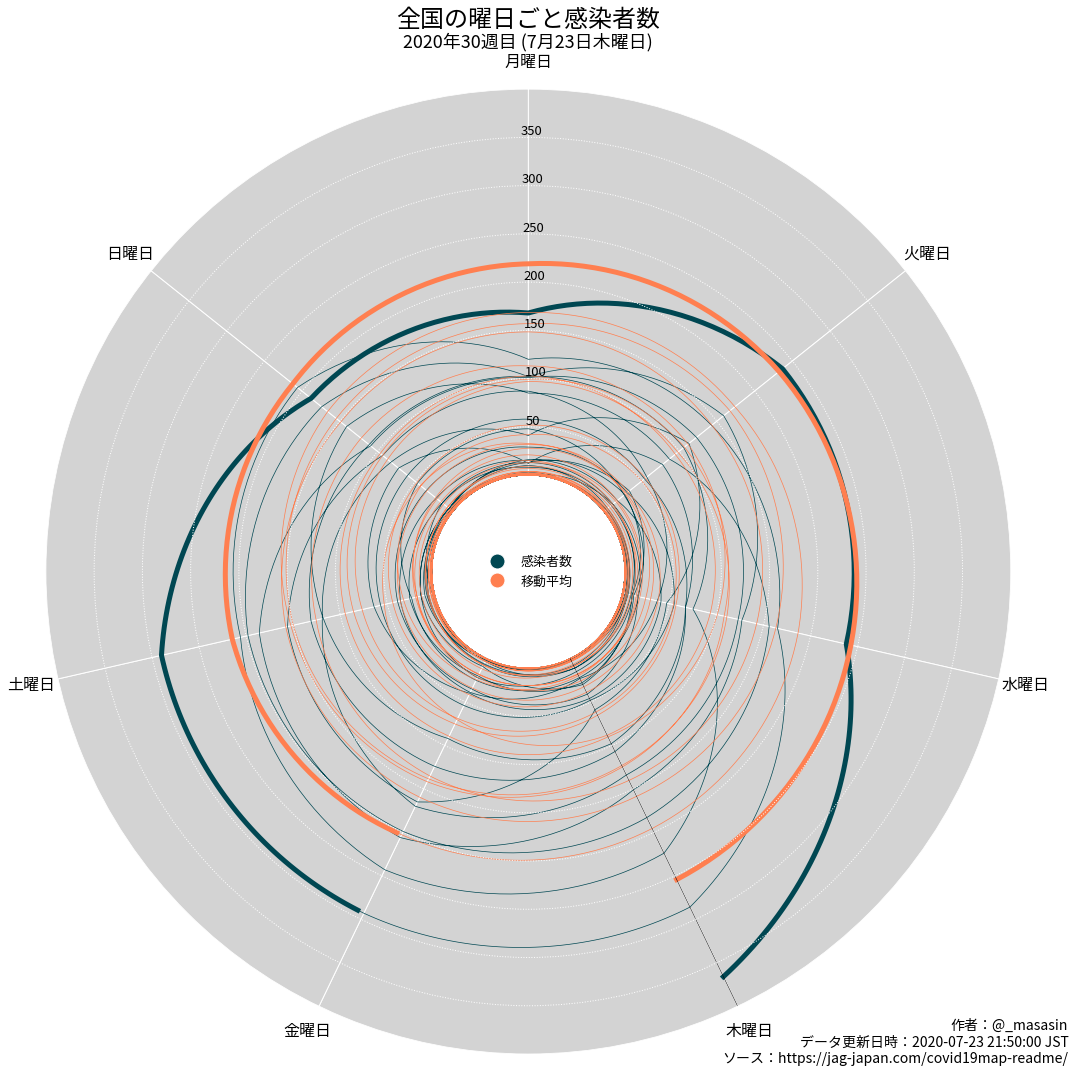

In [67]:
plt.close()
size=15
fig, ax = plt.subplots(figsize=(size, size), subplot_kw=dict(polar=True))
draw_data(tokyo_by_day, len(tokyo_by_day)-1, daily=True, rolling=True, title="全国")

In [70]:
import plotly.express as px

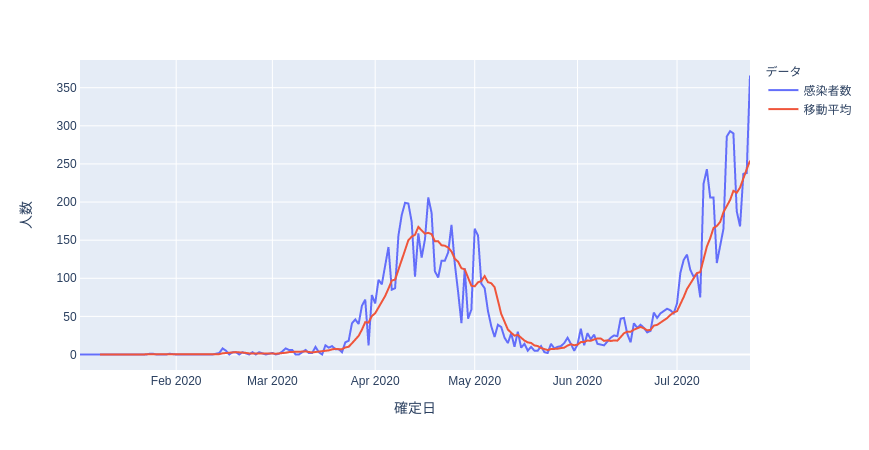

In [71]:
px.line(tokyo_by_day, labels={"variable": "データ", "value": "人数"})

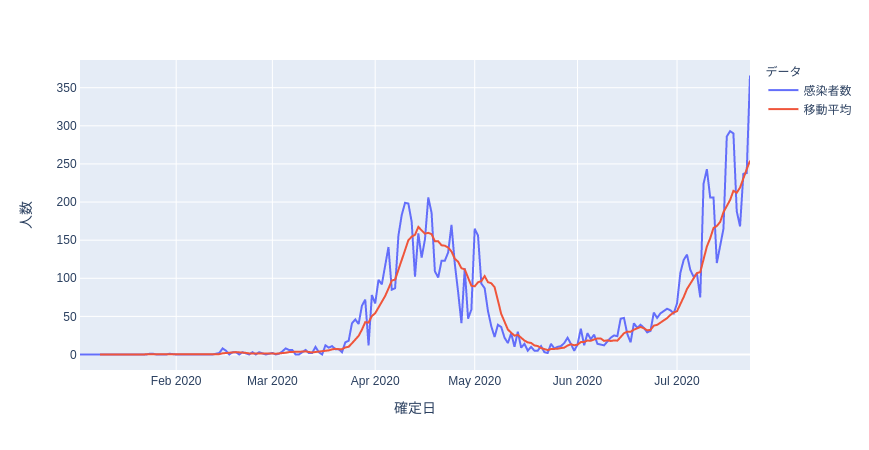

In [72]:
px.line(tokyo_by_day, labels={"variable": "データ", "value": "人数"})

japan True True
japan True False
japan False True
tokyo True True
tokyo True False
tokyo False True
Done!


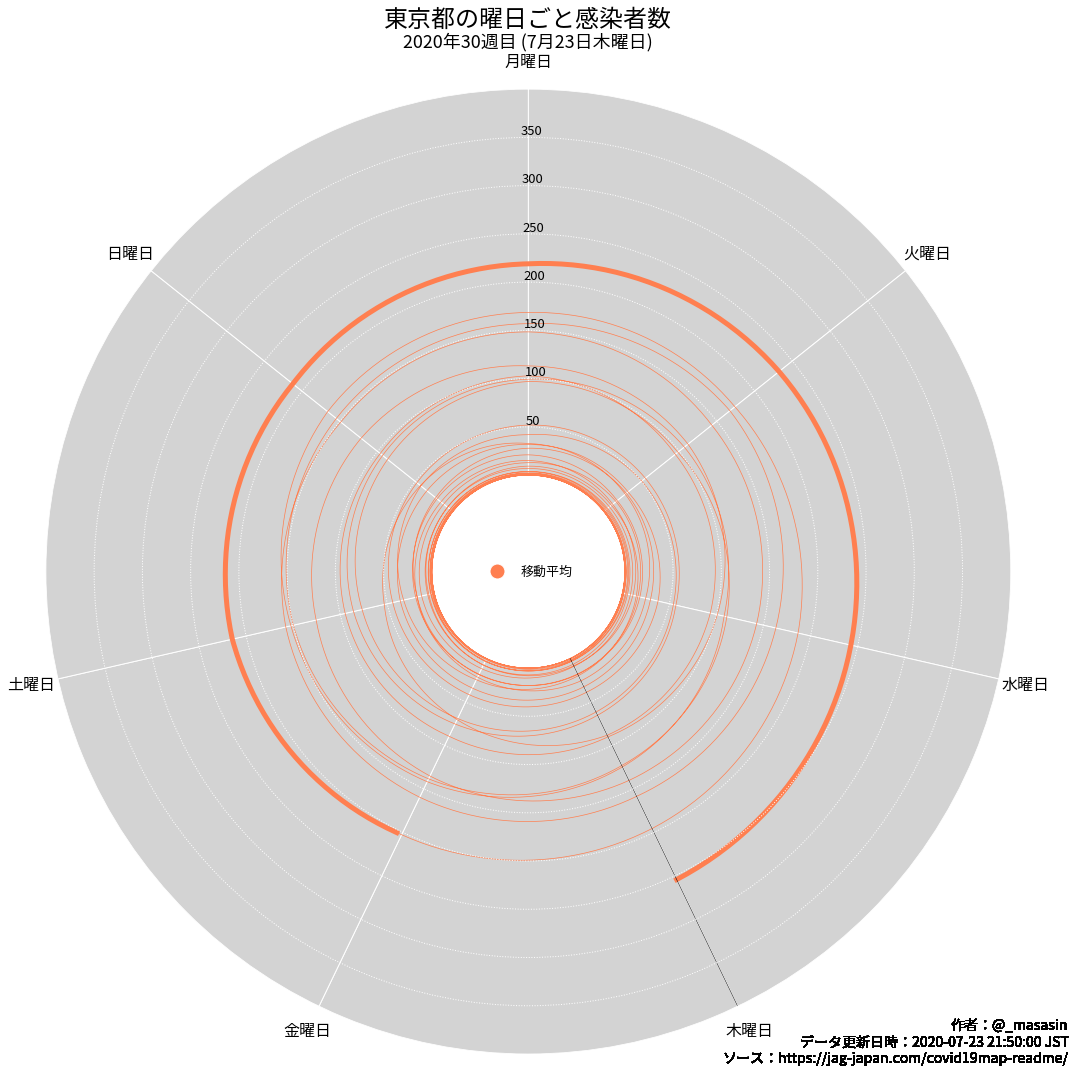

In [73]:
size = 15
for name, pref, filename in [
    ("全国", None, "japan"),
    ("東京都", "Tokyo", "tokyo")
]:
    df = n_infected(pref=pref)
    for daily, rolling in [
        [True, True],
        [True, False],
        [False, True], 
    ]:
        print(filename, daily, rolling)
        plt.close()
        fig, ax = plt.subplots(figsize=(size, size), subplot_kw=dict(polar=True))
        anim = FuncAnimation(fig, partial(draw_data, df, daily=daily, rolling=rolling, title=name), interval=1000//7, frames=len(df), repeat=False)    
        filename_full = filename
        if daily:
            filename_full += "_daily"
        if rolling:
            filename_full += "_rolling"
        anim.save(f'{filename_full}.mp4')
print("Done!")

In [ ]:
HTML(anim.to_html5_video())